<div style="text-align: center;">
<figure>
<img src="Cover.png" alt="Effervescent Tablet" width="50%">
<p style="text-align: center;">Image source: <a href="https://www.youtube.com/watch?v=WkNR9KwaZWE">How does Effervescent Tablet dissolve in water</a></p>
</figure>
</div>

# Physical Chemistry

[**Jozsef Konczer**](https://konczer.github.io/)

[*Computational Thinking With Python*](https://github.com/Konczer/ComputationalThinkingWithPython)

@ [Engame Academy ](https://engame.hu/en/)

## Questions:

* How fast does an effervescent vitamin tablet dissolve in a glass of water at different temperatures?
    * What could be the relevant parameters?
    * How reliable is the dependence?

<div style="text-align: center;">
<figure>
<img src="Plussz.png" alt="Plusssz" width="50%">
<p style="text-align: center;">Image source: <a href="https://maspex.hu/markaink/plusssz/multimineral/">Plusssz effervescent tablet</a></p>
</figure>
</div>

# Abstraction:

* In this case, the all-encompassing complexity of the world is reduced to a table of numbers by an Experiment:
    * 2-5 dl water is poured into a glass,
    * the temperature of the room is measured by a [pH Tester & Thermometer](https://web.archive.org/web/20220817074319/https://www.somogyi.hu/product/ph-teszter-homero-pht-01-12038) (see specification [here](https://web.archive.org/web/20221216011407/https://www.somogyi.hu/data/product_documents/12038_1_03_01.pdf)),
    * the temperature of the water is measured by the same thermometer, sometimes waiting several minutes to reach thermal equilibrium,
    * the [Plusssz effervescent tablet](https://maspex.hu/markaink/plusssz/multimineral/) is dropped into the water, and at the same time, a stopwatch is Started,
    * we observe the dissolution of the effervescent tablet, and when there is no solid part on the surface, we Stop the stopwatch.

In [3]:
# ! pip install pandas

In [1]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt

pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.max_colwidth', None)

### Reading the Experimental Data from a csv file:

In [2]:
data = pd.read_csv('RawData.csv')
data

,Place,GeoLocation,Date,RoomTemperature,WaterTemperature,TimeOfDissolution
0,"Zanzibar, Nungwi","-5.72592, 39.2981",2022-09-06 02:45,26,25,02:09
1,"Zanzibar, Nungwi","-5.72592, 39.2981",2022-09-07 08:08,26,25,02:28
2,"Zanzibar, Nungwi","-5.72592, 39.2981",2022-09-08 11:03,25,47,01:16
3,"Zanzibar, Nungwi","-5.72592, 39.2981",2022-09-09 20:32,25,16,02:53
4,"Zanzibar, Nungwi","-5.72592, 39.2981",2022-09-10 21:16,26,35,01:42
5,"United Kingdom, London","51.5, -0.116667",2022-09-26 11:21,24,19,03:27
6,"Hungary, Budapest","47.51, 19.08",2022-10-06 15:37,24,23,02:14
7,"Hungary, Budapest","47.51, 19.08",2022-10-06 16:47,26,38,01:34
8,"Hungary, Budapest","47.51, 19.08",2022-10-06 21:49,24,5,04:38
9,"Hungary, Budapest","47.51, 19.08",2022-10-07 15:10,24,60,01:10


In [3]:
# Extracting the relevant features:

# Transforming minutes:seconds strings to seconds:
time = data['TimeOfDissolution'].values
time = map(lambda t: t.split(':'), time)
time = np.array([int(m) * 60 + int(s) for m, s in time])

# Extracting temperature data (in Celsius) into a numpy array:
temp = data['WaterTemperature'].values

# Computation:

### Visualization:

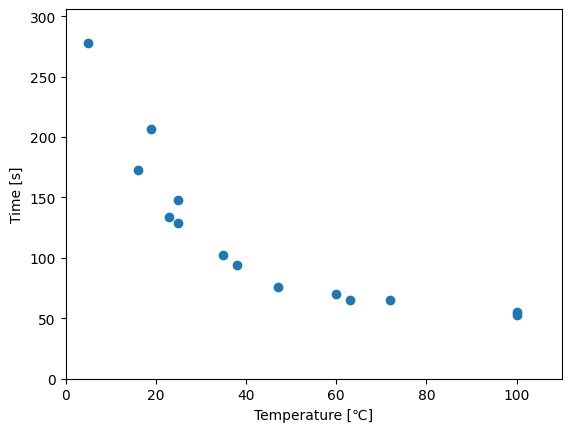

In [4]:
plt.scatter(temp, time)
plt.ylabel('Time [s]')
plt.xlabel('Temperature [℃]')

plt.xlim([0, 1.1 * 100])
plt.ylim([0, 1.1 * max(time)])

plt.show()

### Curve fitting:

In [5]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt    
from scipy import stats
import pandas as pd

# pip install uncertainties, if needed
try:
    import uncertainties.unumpy as unp
    import uncertainties as unc
except:
    try:
        from pip import main as pipmain
    except:
        from pip._internal import main as pipmain
    pipmain(['install','uncertainties'])
    import uncertainties.unumpy as unp
    import uncertainties as unc

Optimal Values
a: -1.7996080411677022
b: 198.51098927523688
R^2: 0.6806478810681694
Uncertainty
a: -1.8+/-0.4
b: 199+/-19


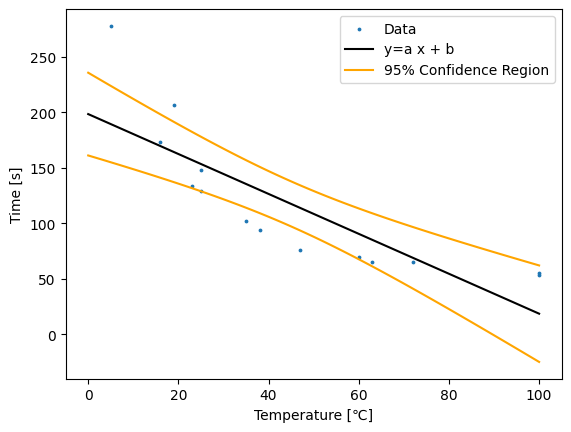

In [6]:
# import data
x = temp
y = time
n = len(y)

def f(x, a, b):
    return a * x + b

popt, pcov = curve_fit(f, x, y)

# retrieve parameter values
print('Optimal Values')
print(f'a: {popt[0]}')
print(f'b: {popt[1]}')

# compute r^2
r2 = 1.0-(sum((y-f(x,*popt))**2)/((n-1.0)*np.var(y,ddof=1)))
print(f'R^2: {r2}')

# calculate parameter confidence interval
a, b = unc.correlated_values(popt, pcov)
print('Uncertainty')
print('a: ' + str(a))
print('b: ' + str(b))

# plot datapip install uncertainties
plt.scatter(x, y, s=3, label='Data')

# calculate regression confidence interval
px = np.linspace(0, 100, 100)
py = a*px+b
nom = unp.nominal_values(py)
std = unp.std_devs(py)

# plot the regression
plt.plot(px, nom, c='black', label='y=a x + b')

# uncertainty lines (95% confidence)
plt.plot(px, nom - 1.96 * std, c='orange',\
         label='95% Confidence Region')
plt.plot(px, nom + 1.96 * std, c='orange')
# prediction band (95% confidence)
plt.ylabel('Time [s]')
plt.xlabel('Temperature [℃]')
plt.legend(loc='best')

# show figure
# plt.savefig('regression.png')
plt.show()

To understand the least squares method better you can play with the following [Geogebra applet](https://www.geogebra.org/m/JsFmFEg6)

In [66]:
# For Nonlinear curve Fitting [Sherpa](https://cxc.harvard.edu/contrib/sherpa/) will be used
# conda install -c sherpa sherpa

Optimal Values
a: 291.85179604724055
b: -4.788900766081282
c: 51.09266442960555
R^2: 0.9619779809009275
Uncertainty
a: 292+/-21
b: -4.8+/-0.6
c: 51+/-8


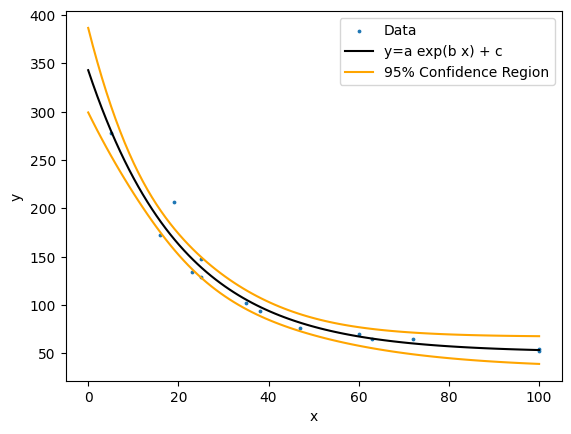

In [7]:
x = temp
y = time
n = len(y)

def f(x, a, b, c):
    return a * np.exp(b*x/100) + c

popt, pcov = curve_fit(f, x, y)

# retrieve parameter values
print('Optimal Values')
print(f'a: {popt[0]}')
print(f'b: {popt[1]}')
print(f'c: {popt[2]}')

# compute r^2
r2 = 1.0-(sum((y-f(x,*popt))**2)/((n-1.0)*np.var(y,ddof=1)))
print(f'R^2: {r2}')

a, b, c = unc.correlated_values(popt, pcov)
print('Uncertainty')
print('a: ' + str(a))
print('b: ' + str(b))
print('c: ' + str(c))

plt.scatter(x, y, s=3, label='Data')

px = np.linspace(0, 100, 100)
py = a*unp.exp(b*px/100)+c
nom = unp.nominal_values(py)
std = unp.std_devs(py)

# plot the regression
plt.plot(px, nom, c='black', label='y=a exp(b x) + c')

# uncertainty lines (95% confidence)
plt.plot(px, nom - 1.96 * std, c='orange',\
         label='95% Confidence Region')
plt.plot(px, nom + 1.96 * std, c='orange')

plt.ylabel('y')
plt.xlabel('x')
plt.legend(loc='best')

# show figure
# plt.savefig('regression.png')
plt.show()

### Model selection:

In [8]:
import matplotlib.pyplot as plt

def auto_fit(k):
    """Fits a Polynomial and Bayesian information criterion (BIC)

    Args:
        k (int): Polynom order

    Returns:
        none: generates Plots
    """

    x = temp
    y = time
    n = len(y)


    def f(x, *coefficients):
        result = 0
        for i, c in enumerate(coefficients):
            result += c * x ** i
        return result

    popt, pcov = curve_fit(f, x, y, p0=np.zeros(k))

    # retrieve parameter values

    upopt=unc.correlated_values(popt, pcov)

    error_variance = np.mean((y - f(x, *popt))**2)
    bic = n * np.log(error_variance) + k * np.log(n)

    # plot data
    plt.scatter(x, y, s=3, label='Data')

    # calculate regression confidence interval
    px = np.linspace(0, 100, 100)
    py = f(px, *upopt)

    nom = unp.nominal_values(py)
    std = unp.std_devs(py)

    plt.plot(px, nom, c='black', label=r'$y=\mathregular{P_{s1}}(x)$'.replace('s1', str(k)))

    # uncertainty lines (95% confidence)
    plt.plot(px, nom - 1.96 * std, c='orange', label='95% Confidence Region')
    plt.plot(px, nom + 1.96 * std, c='orange')

    plt.ylabel('Time [s]')
    plt.xlabel('Temperature [℃]')
    plt.title("BIC: "+str(round(bic,3)))
    plt.legend(loc='best')

    plt.xlim([0, 1.1 * 100])
    plt.ylim([0, 1.1 * max(time)])

    plt.show()

Importing or installing tools from [ipywidgets](https://ipywidgets.readthedocs.io/en/stable/) for interactive Manipulation:

In [9]:
# pip install ipywidgets, if needed

try:
    from ipywidgets import interact, IntSlider
except:
    try:
        from pip import main as pipmain
    except:
        from pip._internal import main as pipmain
    pipmain(['install','ipywidgets'])
    from ipywidgets import interact, IntSlider

In [14]:
interact(auto_fit, k=IntSlider(min=1, max=10, step=1, value=1, description='Order'));

interactive(children=(IntSlider(value=1, description='Order', max=10, min=1), Output()), _dom_classes=('widget…

### Coordinate transformation:

In [15]:
# Inverse thermodinamic temperature in (k K)^(-1)
invabstemp = 1000/(273.15 + temp)

# Logarithm of the time measured in minutes (Neper)
logtime = np.log(time/60)

Arhenius law:

$$ k \approx e^{- \frac{a}{T}  } $$

$$ t = B \ e^{ \frac{a}{T} } $$

Optimal Values
a: 1.7148242891746295
b: -4.891272681338587
R^2: 0.8978988689500922
Uncertainty
a: 1.71+/-0.17
b: -4.9+/-0.5


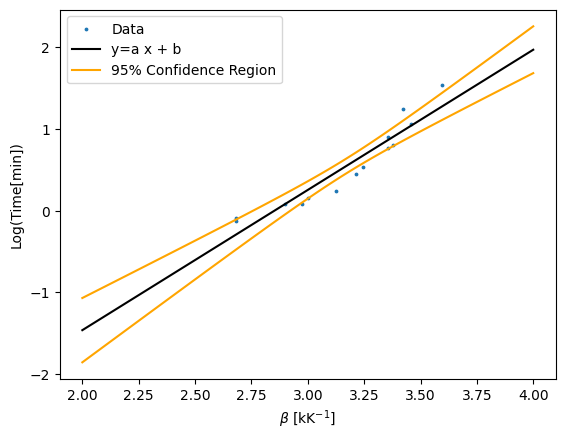

In [16]:
# import data
x = invabstemp
y = logtime
n = len(y)

def f(x, a, b):
    return a * x + b

popt, pcov = curve_fit(f, x, y)

# retrieve parameter values
print('Optimal Values')
print(f'a: {popt[0]}')
print(f'b: {popt[1]}')

# compute r^2
r2 = 1.0-(sum((y-f(x,*popt))**2)/((n-1.0)*np.var(y,ddof=1)))
print(f'R^2: {r2}')

# calculate parameter confidence interval
a, b = unc.correlated_values(popt, pcov)
print('Uncertainty')
print('a: ' + str(a))
print('b: ' + str(b))

# plot data
plt.scatter(x, y, s=3, label='Data')

# calculate regression confidence interval
px = np.linspace(2, 4, 100)
py = a*px+b
nom = unp.nominal_values(py)
std = unp.std_devs(py)


# plot the regression
plt.plot(px, nom, c='black', label='y=a x + b')

# uncertainty lines (95% confidence)
plt.plot(px, nom - 1.96 * std, c='orange',\
         label='95% Confidence Region')
plt.plot(px, nom + 1.96 * std, c='orange')

plt.ylabel('Log(Time[min])')
plt.xlabel('$\\beta$ [$\\mathrm{kK}^{-1}$]')
plt.legend(loc='best')

# show figure
# plt.savefig('regression.png')
plt.show()

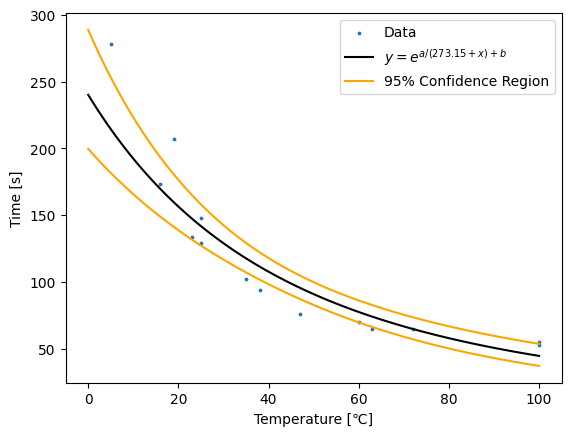

In [32]:
# plot data
plt.scatter(temp, time, s=3, label='Data')

# calculate regression confidence interval

px0 = np.linspace(0, 100, 100)

px = 1000 / (273.15 + px0)
py = a*px+b
nom = unp.nominal_values(py)
std = unp.std_devs(py)

# plot the regression
plt.plot(px0, 60 * np.exp(nom), c='black', label='$y = e^{a/(273.15+x) + b}$')

# uncertainty lines (95% confidence)
plt.plot(px0, 60 * np.exp(nom - 1.96 * std), c='orange',\
         label='95% Confidence Region')
plt.plot(px0, 60 * np.exp(nom + 1.96 * std), c='orange')

plt.ylabel('Time [s]')
plt.xlabel('Temperature [℃]')
plt.legend(loc='best')

# show figure
# plt.savefig('regression.png')
plt.show()

Modified Arhenius law:

$$ k \approx e^{-\left ( \frac{a}{T} \right )^c} $$

$$ t = B \ e^{\left ( \frac{a}{T} \right )^c} $$

Optimal Values
a: 0.00011621775140334353
b: -0.334847047377038
c: 7.595906892300431
R^2: 0.9726506599317777
Uncertainty
a: 0.00012+/-0.00020
b: -0.33+/-0.13
c: 7.6+/-1.3


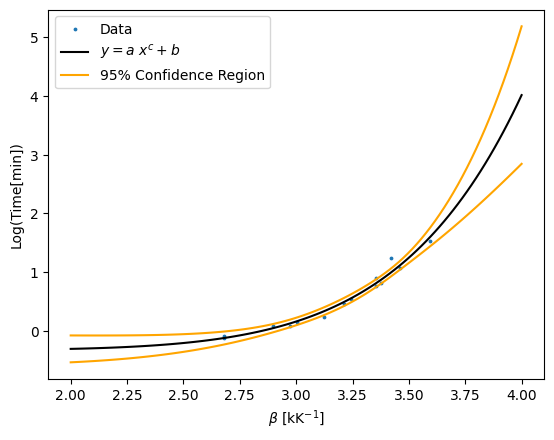

In [49]:
# import data
x = invabstemp
y = logtime
n = len(y)

def f(x, a, b, c):
    return a * x**c + b

popt, pcov = curve_fit(f, x, y)

# retrieve parameter values
print('Optimal Values')
print(f'a: {popt[0]}')
print(f'b: {popt[1]}')
print(f'c: {popt[2]}')

# compute r^2
r2 = 1.0-(sum((y-f(x,*popt))**2)/((n-1.0)*np.var(y,ddof=1)))
print(f'R^2: {r2}')

# calculate parameter confidence interval
a,b,c = unc.correlated_values(popt, pcov)
print('Uncertainty')
print('a: ' + str(a))
print('b: ' + str(b))
print('c: ' + str(c))

# plot data
plt.scatter(x, y, s=3, label='Data')

# calculate regression confidence interval
px = np.linspace(2, 4, 100)
py = a*px**c+b
nom = unp.nominal_values(py)
std = unp.std_devs(py)

# plot the regression
plt.plot(px, nom, c='black', label='$y=a \\  x^c + b$')

# uncertainty lines (95% confidence)
plt.plot(px, nom - 1.96 * std, c='orange',\
         label='95% Confidence Region')
plt.plot(px, nom + 1.96 * std, c='orange')

plt.ylabel('Log(Time[min])')
plt.xlabel('$\\beta$ [$\\mathrm{kK}^{-1}$]')
plt.legend(loc='best')

# show figure
# plt.savefig('regression.png')
plt.show()

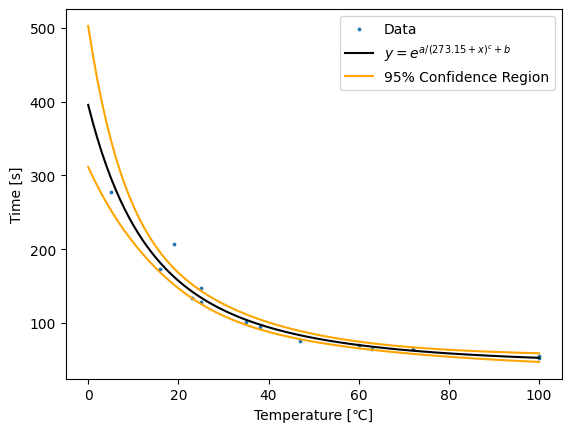

In [51]:
# plot data
plt.scatter(temp, time, s=3, label='Data')

# calculate regression confidence interval

px0 = np.linspace(0, 100, 100)

px = 1000 / (273.14 + px0)
py = a*px**c+b
nom = unp.nominal_values(py)
std = unp.std_devs(py)

# plot the regression
plt.plot(px0, 60 * np.exp(nom), c='black', label='$y=e^{a/(273.15+x)^c + b}$')

# uncertainty lines (95% confidence)
plt.plot(px0, 60 * np.exp(nom - 1.96 * std), c='orange',\
         label='95% Confidence Region')
plt.plot(px0, 60 * np.exp(nom + 1.96 * std), c='orange')

plt.ylabel('Time [s]')
plt.xlabel('Temperature [℃]')
plt.legend(loc='best')

# show figure
# plt.savefig('regression.png')
plt.show()

## Interpretation:

Check with a live experiment!

## References and Resources:

* Quick start:
    * [Arrhenius equation](https://en.wikipedia.org/wiki/Arrhenius_equation)
    * [Regression Statistics with Python](https://apmonitor.com/che263/index.php/Main/PythonRegressionStatistics)
    * [Model selection](https://en.wikipedia.org/wiki/Model_selection)
    * [Bayesian information criterion](https://en.wikipedia.org/wiki/Bayesian_information_criterion)
* Deep dive:
    * [Modified Arrhenius Equation](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC8658926/)
    * [Neper](https://en.wikipedia.org/wiki/Neper)
    * [Non linear curve fitting with python](https://gsalvatovallverdu.gitlab.io/python/curve_fit/)
    * [Least squares](https://www.youtube.com/watch?v=q7seckj1hwM) probabilistic interpretation